In [2]:
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import shutil

In [ ]:
def run_agent_test(agent_import_line, map_file, num_agents=5, n_packages=100, max_steps=1000, seed=10):
    """Chạy một agent trên một bản đồ bằng cách sửa tạm thời file main.py"""
    # Backup main.py
    shutil.copy('main.py', 'main.py.bak')
    
    try:
        # Đọc file main.py
        with open('main.py', 'r') as f:
            lines = f.readlines()
        
        # Thay đổi dòng import agent
        for i, line in enumerate(lines):
            if line.startswith('from ') and ' as Agents' in line:
                lines[i] = agent_import_line + '\n'
                break
        
        # Ghi lại file main.py với agent mới
        with open('main.py', 'w') as f:
            f.writelines(lines)
        
        # Chạy command
        cmd = f"python main.py --seed {seed} --max_time_steps {max_steps} --map {map_file} --num_agents {num_agents} --n_packages {n_packages}"
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        
        # Lấy kết quả
        output = result.stdout
        match = re.search(r"Total reward: ([-+]?\d*\.\d+|\d+)", output)
        if match:
            reward = float(match.group(1))
        else:
            reward = 0
            
        return reward
        
    finally:
        # Khôi phục main.py
        shutil.copy('main.py.bak', 'main.py')
        os.remove('main.py.bak')

In [18]:
def compare_agents(agents, map_files, num_agents=5, n_packages=100, max_steps=1000, seed=10):
    """So sánh nhiều agents trên nhiều bản đồ"""
    results = []
    
    for map_file in map_files:
        row = {"Map": map_file}
        
        for agent_name, agent_import in agents.items():
            reward = run_agent_test(agent_import, map_file, num_agents, n_packages, max_steps, seed)
            row[agent_name] = reward
            print(f"Đã chạy {agent_name} trên {map_file}: {reward}")
            
        results.append(row)
    
    # Tạo DataFrame
    df = pd.DataFrame(results)
    
    # Lưu kết quả dạng CSV
    df.to_csv("agent_comparison.csv", index=False)
    
    # Tạo bảng hình ảnh
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.set_index("Map"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
    plt.title("So sánh hiệu suất các agent trên các bản đồ")
    plt.tight_layout()
    plt.savefig("agent_comparison.png", dpi=300)
    
    return df

Đã chạy Greedy trên map.txt: 19.77999999999999
Đã chạy A* Optimal trên map.txt: 188.60999999999927
Đã chạy Greedy trên map1.txt: 29.66
Đã chạy A* Optimal trên map1.txt: 313.27000000000356
Đã chạy Greedy trên map2.txt: 38.700000000000024
Đã chạy A* Optimal trên map2.txt: 181.4700000000001
Đã chạy Greedy trên map3.txt: 9.060000000000015
Đã chạy A* Optimal trên map3.txt: 51.0699999999995
Đã chạy Greedy trên map4.txt: 38.96000000000006
Đã chạy A* Optimal trên map4.txt: 183.2699999999991
Đã chạy Greedy trên map5.txt: -1.0200000000000007
Đã chạy A* Optimal trên map5.txt: 43.88999999999953

Kết quả so sánh:
        Map  Greedy  A* Optimal
0   map.txt   19.78      188.61
1  map1.txt   29.66      313.27
2  map2.txt   38.70      181.47
3  map3.txt    9.06       51.07
4  map4.txt   38.96      183.27
5  map5.txt   -1.02       43.89

Đã lưu bảng vào agent_comparison.csv
Đã lưu hình ảnh vào agent_comparison.png


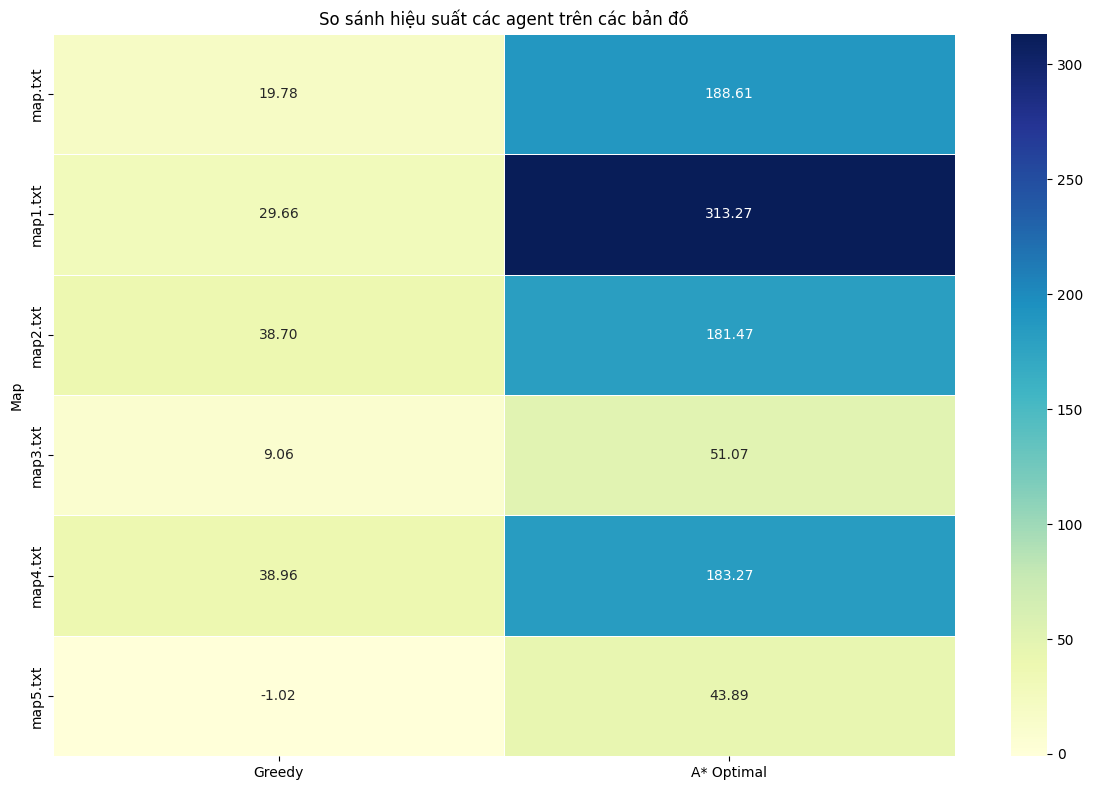

In [19]:
if __name__ == "__main__":
    # Các agents cần so sánh (tên hiển thị: dòng import)
    agents = {
        "Greedy": "from greedyagent import GreedyAgents as Agents",
        "A* Optimal": "from astaragent import OptimalAStarAgent as Agents"
    }
    
    # Các map files để test
    map_files = ["map.txt", "map1.txt", "map2.txt", "map3.txt", "map4.txt", "map5.txt"]
    
    # Chạy so sánh
    results = compare_agents(agents, map_files)
    print("\nKết quả so sánh:")
    print(results)
    print("\nĐã lưu bảng vào agent_comparison.csv")
    print("Đã lưu hình ảnh vào agent_comparison.png")